In [12]:
import numpy as np
class board:
    def __init__(self,obsticles,m=18,n=9):
        self.m=m
        self.n=n
        self.pg=[]
        self.obsticles=obsticles
        self.dots=np.ones([m,n])
    def copy(self):
        e=board(self.obsticles.copy(),self.m,self.n)
        e.pg=self.pg.copy()
        e.dots=self.dots.copy()
        return e
    def add_pg(self,pg):
        self.pg.append(pg)
    def request_move(self,w,index):
        pg=self.pg[index]
        if w==0  and pg.y<self.n-1:
            next=np.array([pg.x,pg.y+1])
        elif w==1  and pg.x<self.m-1:
            next=np.array([pg.x+1,pg.y])
        elif w==2  and pg.y>0:
            next=np.array([pg.x,pg.y-1])
        elif w==3 and pg.x>0 :
            next=np.array([pg.x-1,pg.y])
        else:
            next=np.array([pg.x,pg.y])
        if index==0 :
            pg.score=pg.score-1
            if self.dots[next[0],next[1]]==1:
                self.dots[next[0],next[1]]=0
                pg.score=pg.score+10
        if not((self.obsticles==next).all(axis=1)).any():
            pg.x,pg.y=next[0],next[1]
            return True
        return False
    def Map(self):
        b=np.zeros([self.m,self.n],dtype=np.int8)
        for i in self.pg:
            b[i.x,i.y]=2
        b[self.pg[0].x,self.pg[0].y]=1
        b[self.obsticles[:,0],self.obsticles[:,1]]=-1
        return b  
    def step(self):
        for i in self.pg:
             i.go()          
        

In [13]:
class PG:
    def __init__(self,x,y,enviroment=None):
        self.x=x
        self.y=y
        self.enviroment=enviroment
        self.score=10
        if not enviroment==None:
            enviroment.add_pg(self)
            self.index=len(enviroment.pg)-1
    def move(self,w):
        self.enviroment.request_move(w,self.index)
        # self.x,self.y=self.enviroment.pg[self.index].x,self.enviroment.pg[self.index].y


In [49]:
l=[]
p.sucssesor(l)
print(l[0]==l[1])
# print(aw)

[[ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True False  True  True  True  True  True  True  True]
 [ True False  True  True  True  True  True  True  True]
 [ True  True  True  True  True

In [14]:
class Pacman(PG):
    def __init__(self, x, y, enviroment=None):
        super().__init__(x, y, enviroment)
        if not enviroment==None:
            self.enviroment.dots[x,y]=0
    def sucssesor(self,l):
        b=self.enviroment.copy()
        pg=b.pg
        for i in range(1,5):
            pg[0].move(i)
            for j in range(1,5):
                pg[1].move(j)
                for k in range(1,5):
                    pg[2].move(k)
                    l.append(b.Map())
                    pg[1].move((i+2)%4+1)
                    pg[2].move((i+2)%4+1)
            pg[0].move((i+2)%4+1)
    def desision(self):
        b=self.enviroment.copy()
        self.Max_search(b)
    def Max_search(self,b,depth=0):
        if depth<5:
            for i in range(4):
                b.pg[0].move(i)
                b.pg[0].Min_serach(depth+1)
                b.pg[0].move((i+2)%4+1)

    def Min_search(self,b,depth):
        if depth<5:
            for i in range(4):
                b.pg[0].move(i)
                b.pg[0].Min_serach(depth+1)
                b.pg[0].move((i+2)%4+1)
    def go(self):
        self.move(np.random.choice(4)+1)

In [15]:
class ghost(PG):
    def __init__(self, x, y, enviroment=None):
        super().__init__(x, y, enviroment)
    def go(self):
        self.move(np.random.choice(4)+1)


In [5]:
def random_place(m,n,k):
    index_array1 = np.arange(m)
    index_array2 = np.arange(n)
    np.random.shuffle(index_array1)
    np.random.shuffle(index_array2)
    x,y=index_array1[0:k],index_array2[0:k]
    x=np.concatenate((x,y)).reshape((k,2))
   
    return x

In [16]:
m=18
n=9
k=4
obs=np.array([[1,2],[3,4]])
b=board(obs,m,n)
# ************
# o=random_place(m,n,k+3)
# b.add_obsticle(o[0:k-1,:])
# p=Pacman(o[k,0],o[k,1],b)
# g1=ghost(o[k+1,0],o[k+1,1],b)
# g2=ghost(o[k+2,0],o[k+2,1],b)
# ******************
# obs=np.random.random_integers(18)

# np.random.choice(np.arange(10,20), size=(5,2), replace=True)
p=Pacman(5,5,b)
g1=ghost(7,7,b)
g2=ghost(6,6,b)


In [42]:
b.step()
b.Map()

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int8)

In [20]:
# b.pg[0].x
# # 100%7
# al=b.copy()
# print(al.m)
# # p.sucssesor()
# # print(b.Map())
# a=[]
# a.append(al.Map())
# a.append(al.Map())
# print(len(a))
p.x
p.move(1)
p.x

8

In [29]:
# import numpy as np
# class board:
#     def __init__(self,m,n,obs,x,y):
#         self.m=m
#         self.n=n
#         self.pg=[Pacman(x,y)]
#         self.obsticles=obs
#         self.dots=np.ones([self.m,self.n])
#         self.dots[x,y]=0
#     def add_pg(self,pg):
#         if (pg.x,pg.y) not in self.obsticles :
#             self.pg.append(pg)
#             return True
#         return False
#     def request_move(self,w,index):
#         pg=self.pg[index]
#         if w==1  and pg.y<self.n-1:
#             next=np.array([pg.x,pg.y+1])
#         elif w==2  and pg.x<self.m-1:
#             next=np.array([pg.x+1,pg.y])
#         elif w==3  and pg.y>0:
#             next=np.array([pg.x,pg.y-1])
#         elif w==4 and pg.x>0 :
#             next=np.array([pg.x-1,pg.y])
#         else:
#             next=np.array([pg.x,pg.y])
#         if index==0 :
#             pg.score=pg.score-1
#             if self.dots[next[0],next[1]]==1:
#                 self.dots[next[0],next[1]]=0
#                 pg.score=pg.score+10
#         if not((self.obsticles==next).all(axis=1)).any():
#             pg.x,pg.y=next[0],next[1]
#             return True
#         return False
#     def Map(self):
#         b=np.zeros([self.m,self.n],dtype=np.int8)
#         for i in self.pg:
#             b[i.x,i.y]=2
#         b[self.pg[0].x,self.pg[0].y]=1
#         b[self.obsticles[:,0],self.obsticles[:,1]]=-1
#         return b  
#     def step(self):
#         for i in self.pg:
#              i.go()  
# class x():
#     def __init__(self,r=5):
#         self.ed=r
#     def copy(self):
#         e=x()
#         e.ed=self.ed.copy
#         return e
        
# w=x()
# w2=w.copy()
# w2.ed=10
# print(w.ed,w2.ed)
r=np.array([10,2])
b=r.copy()
b

array([10,  2])

In [125]:
def random_place(m,n,k):
    index_array1 = np.arange(m)
    index_array2 = np.arange(n)
    np.random.shuffle(index_array1)
    np.random.shuffle(index_array2)
    x,y=index_array1[0:k],index_array2[0:k]
    return x,y

In [41]:
b.pg[0].x

5

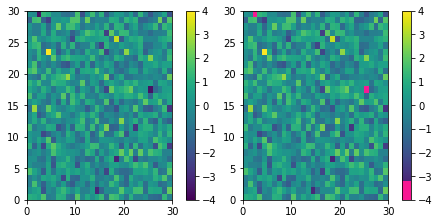

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 12)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)


def plot_examples(cms):

    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([viridis, newcmp])

In [11]:
# fig=plt.figure()
# for i in range(len(l)):
#     plt.pcolormesh(l[i], rasterized=True, vmin=-4, vmax=4)
#     plt.show()
class a():
    def __init__(self,x) -> None:
        self.x=x
    def copy(self):
        return a(self.x)
x=a(5)
def f(x):
    y=x.copy()
    y.x=10
    return y
b=f(x)
print(x.x,b.x)

5 10
